# Demo notebook with timing

Notebook has been runned on a ubuntu desktop with a ryzen 5900X and python 3.11.8.
It uses a CRSP database from 1973 to end 2023, roughly 44,276,311 rows for 12 columns, or 850Mb in parquet format.

In [1]:
import numpy as np
import py_event_studies as pes
from IPython.display import display

## Loading your datas
- clear_cache if you want to remove the cached datas (optionnal)
- load_data to load CRSP datas (required)
- load_ff_factors to load Fama and French factors (Optional, if not loaded will be present in results but should not be used)

To note: It uses a caching methods on datas making any reload in the future without change of config much faster

In [2]:
%%time

pes.clear_cache() # If you want to clear the cache manually (not necessary, used here for demo and showing usefullness bellows)

Cache cleared successfully.
CPU times: user 0 ns, sys: 1.02 s, total: 1.02 s
Wall time: 1.03 s


In [3]:
%%time 
# First load is a bit long due to preprocessing
pes.load_data('../.data/CRSPAllClean.parquet')
pes.load_ff_factors('../.data/FF5.csv')


Loading and preprocessing data from ../.data/CRSPAllClean.parquet
Cached preprocessed data for ../.data/CRSPAllClean.parquet
Using cached data for ../.data/CRSPAllClean.parquet
CPU times: user 53.2 s, sys: 34.9 s, total: 1min 28s
Wall time: 1min 18s


In [4]:
%%time 
# While second use caching mechanism and is much faster (using files, not RAM, so will works over multiple sessions)
pes.load_data('../.data/CRSPAllClean.parquet')
pes.load_ff_factors('../.data/FF5.csv')


Using cached data for ../.data/CRSPAllClean.parquet
CPU times: user 781 ms, sys: 6.96 s, total: 7.74 s
Wall time: 7.74 s


## Running event studies

- get_valid_permno_at_date: get valid permno given current config values for event/estim periods and delta in between (Optional)
- compute to run all the models and create a Results object

To note: first time usage requires compilation which is a bit long, nearly 2 minutes here, after this it only takes a few seconds to run

In [5]:
%%time 
# The first time the function is launched it requires compilation of some of the backend functions that will take a much longer time than after it
event_date = '20120816'
valid_permnos = pes.get_valid_permno_at_date(event_date)

results = pes.compute(event_date, valid_permnos[np.array([1,10,50,23,35, 102, 55, 66, 548,1002])])
print(results)

Event Study Results
Event Date: 20120816
Portfolio: [10026 10421 12374 11370 12009]...
Number of stocks: 10
Estimation period: 249 days
Event period: 10 days
Number of cluster configurations: 9
Number of models: 10
Available tests: std, CS, BMP, KP
CPU times: user 1min 49s, sys: 3.9 s, total: 1min 53s
Wall time: 1min 58s


In [6]:
%%time 
# As soon as it's the second or more run on the function on your machine time become much more reasonable
event_date = '20120816'
valid_permnos = pes.get_valid_permno_at_date(event_date)

results = pes.compute(event_date, valid_permnos[np.array([1,10,50,23,35, 66, 548,1002])])
print(results)

Event Study Results
Event Date: 20120816
Portfolio: [10026 10421 12374 11370 12009]...
Number of stocks: 8
Estimation period: 249 days
Event period: 10 days
Number of cluster configurations: 9
Number of models: 10
Available tests: std, CS, BMP, KP
CPU times: user 379 ms, sys: 273 ms, total: 652 ms
Wall time: 4.53 s


## Using Results object
- help method
- summary to see all
- plot to display for a given models prediction and real values

In [7]:
# Get help on available methods and properties
results.help()

Available methods and properties:
- estim_preds: Predicted returns for estimation period
- event_preds: Predicted returns for event period
- std_test_stats, cs_test_stats, bmp_test_stats, kp_test_stats: Test statistics
- std_p_values, cs_p_values, bmp_p_values, kp_p_values: P-values for tests
- get_test_result(test_name): Get test statistics for a specific test
- get_p_values(test_name): Get p-values for a specific test
- summary(): Print a detailed summary of results
- plot(cluster_idx, model_idx): Plot true vs predicted returns for a specific model and cluster configuration
- to_excel(filename): Export results to an Excel file


In [8]:
# Access test statistics and p-values
display(results.std_test_stats)
display(results.std_p_values)

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,0.434610,0.478027,0.478679,0.425103,0.587359,0.585221,0.522602,-45.303332,-0.336558,-0.798079
10,0.490471,0.534214,0.535003,0.483022,0.587359,0.585221,0.522602,-1.030822,-0.210057,-1.420302
15,0.535837,0.567246,0.567683,0.516732,0.587359,0.585221,0.522602,-4.642033,-0.468522,-1.611048
20,0.602951,0.609668,0.612009,0.556446,0.587359,0.585221,0.522602,-0.125627,0.457549,0.480371
25,0.385952,0.394913,0.393282,0.358488,0.587359,0.585221,0.522602,-3.638762,-0.047815,-0.943998
30,0.452556,0.453455,0.451287,0.401005,0.587359,0.585221,0.522602,0.048407,1.141462,1.056563
35,0.395482,0.437462,0.437410,0.384442,0.587359,0.585221,0.522602,-0.824993,0.327851,-0.610118
40,0.534389,0.545667,0.543138,0.482316,0.587359,0.585221,0.522602,-0.995725,0.415549,0.202472
50,0.438516,0.452160,0.452008,0.419215,0.587359,0.585221,0.522602,0.958416,0.491880,0.350175


,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,0.898687,0.877118,0.867694,0.858084,0.826709,0.821051,0.835083,0.030507,0.937207,0.714704
10,0.873787,0.850454,0.840130,0.827642,0.826709,0.821051,0.835083,0.590617,0.974773,0.414513
15,0.852281,0.834112,0.823656,0.809983,0.826709,0.821051,0.835083,0.064719,0.883795,0.347547
20,0.818767,0.812544,0.800925,0.789444,0.826709,0.821051,0.835083,0.990860,0.888692,0.878427
25,0.918707,0.913252,0.906596,0.892366,0.826709,0.821051,0.835083,0.089945,0.998668,0.635969
30,0.890896,0.888252,0.880608,0.870638,0.826709,0.821051,0.835083,0.998635,0.535559,0.577505
35,0.914920,0.895305,0.887005,0.879181,0.826709,0.821051,0.835083,0.700069,0.940262,0.815089
40,0.852984,0.844838,0.836057,0.828013,0.826709,0.821051,0.835083,0.608755,0.906728,0.976528
50,0.897009,0.888829,0.880274,0.861162,0.826709,0.821051,0.835083,0.628332,0.873135,0.932303


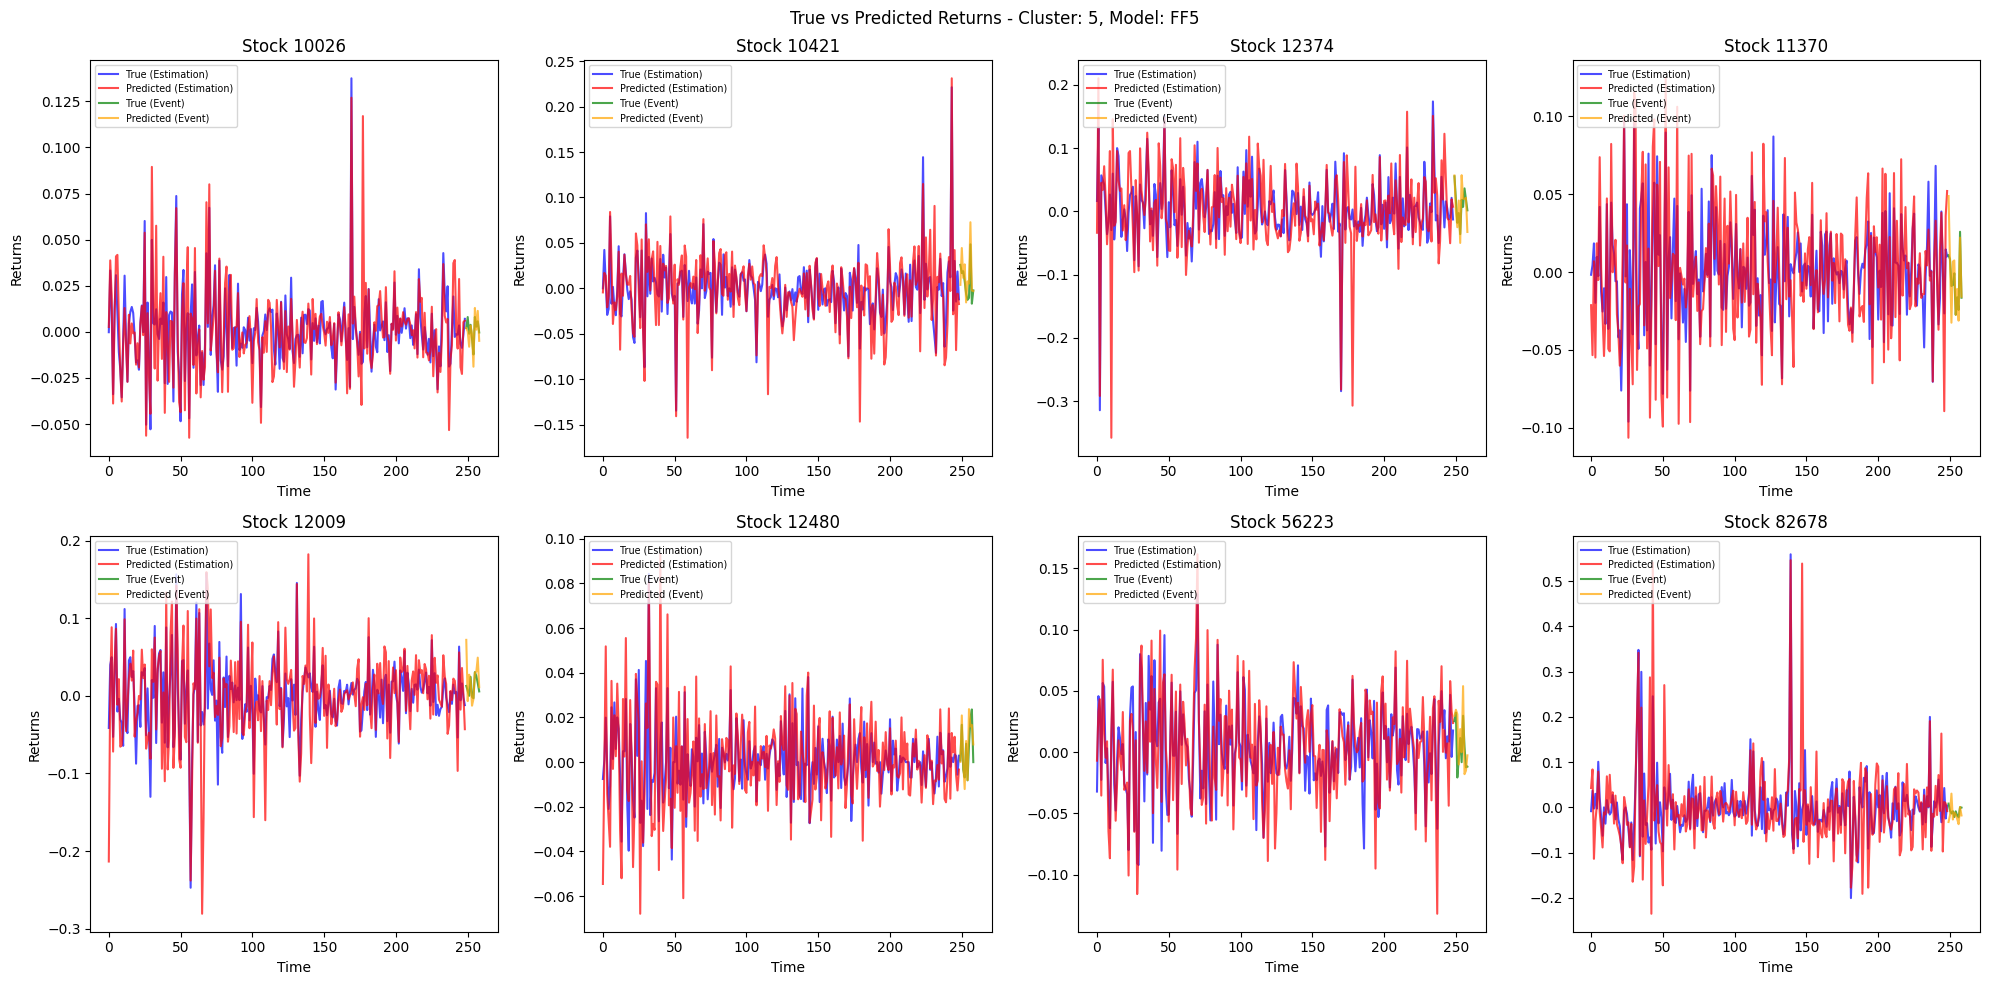

In [9]:
# Plot prediction with one method only for all stocks on whole period
results.plot(5, 'FF5')

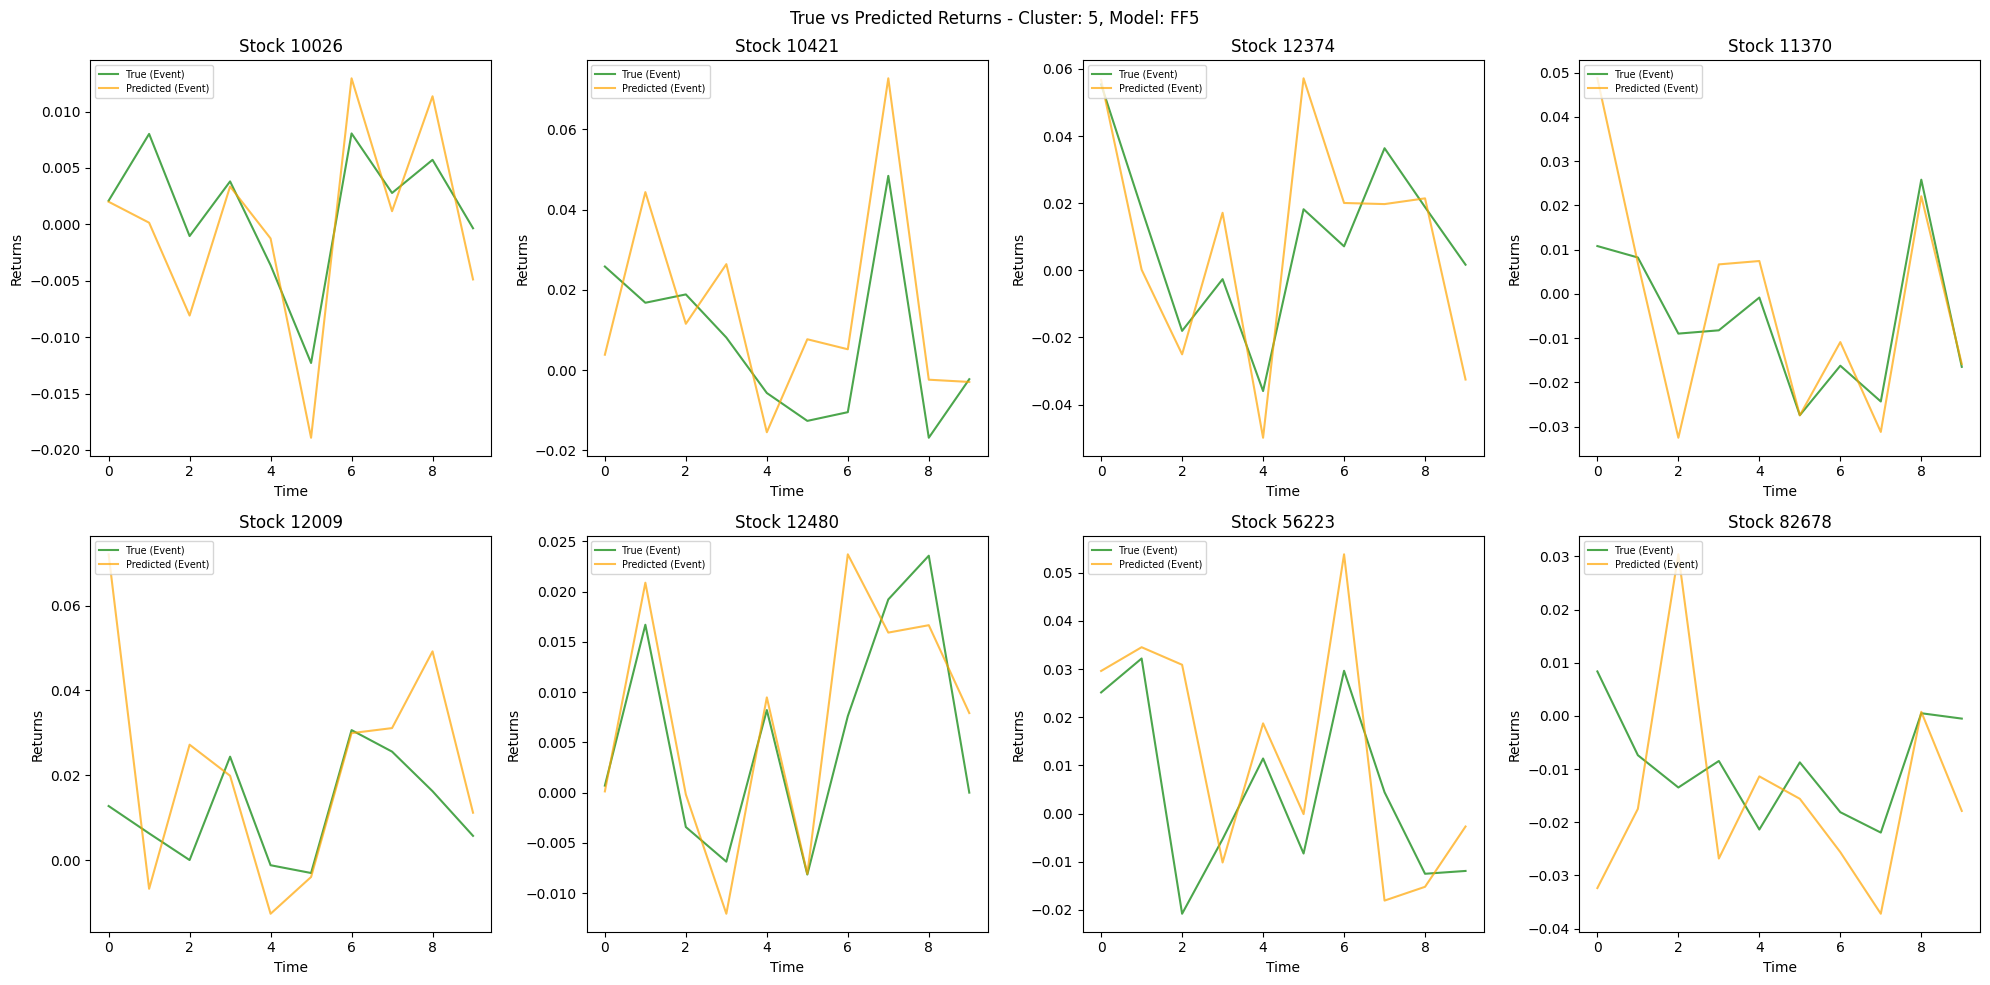

In [10]:
# Plot prediction with one method only for all stocks on whole period
results.plot(5, 'FF5', only_event=True)

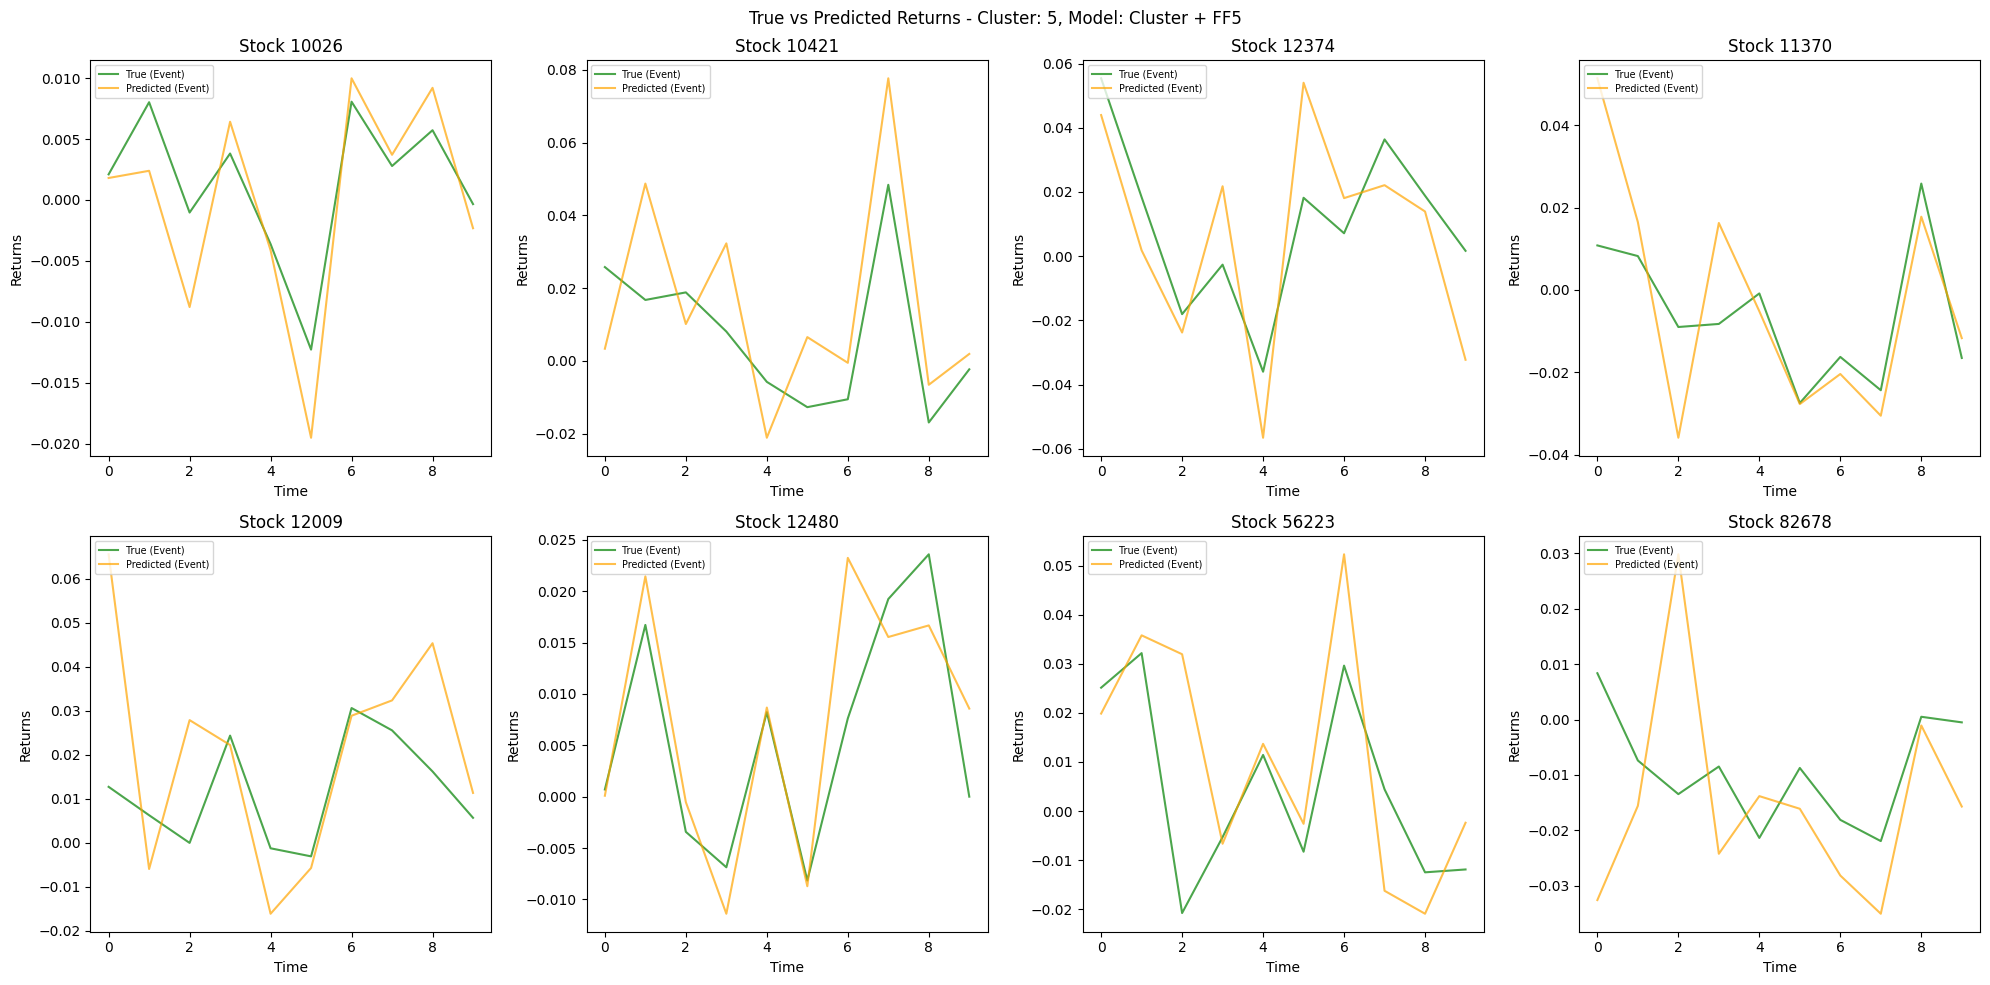

In [11]:
results.plot(5, 'Cluster + FF5', only_event=True)

In [12]:
shock = 0.01
c_vector_generator = lambda shape: np.random.uniform(1, 2, shape)


In [13]:
# Display summary, 
results.summary()

'Event Date: 20120816'

'Portfolio: [10026 10421 12374 11370 12009 12480 56223 82678]'

'Number of stocks: 8'

'Estimation period: 249 days'

'Event period: 10 days'

'\nTest Results:'

'\nNon Cumulative std Test:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,0.434610,0.478027,0.478679,0.425103,0.587359,0.585221,0.522602,-45.303332,-0.336558,-0.798079
10,0.490471,0.534214,0.535003,0.483022,0.587359,0.585221,0.522602,-1.030822,-0.210057,-1.420302
15,0.535837,0.567246,0.567683,0.516732,0.587359,0.585221,0.522602,-4.642033,-0.468522,-1.611048
20,0.602951,0.609668,0.612009,0.556446,0.587359,0.585221,0.522602,-0.125627,0.457549,0.480371
25,0.385952,0.394913,0.393282,0.358488,0.587359,0.585221,0.522602,-3.638762,-0.047815,-0.943998
30,0.452556,0.453455,0.451287,0.401005,0.587359,0.585221,0.522602,0.048407,1.141462,1.056563
35,0.395482,0.437462,0.437410,0.384442,0.587359,0.585221,0.522602,-0.824993,0.327851,-0.610118
40,0.534389,0.545667,0.543138,0.482316,0.587359,0.585221,0.522602,-0.995725,0.415549,0.202472
50,0.438516,0.452160,0.452008,0.419215,0.587359,0.585221,0.522602,0.958416,0.491880,0.350175


'\nNon Cumulativestd Test P-values:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,0.898687,0.877118,0.867694,0.858084,0.826709,0.821051,0.835083,0.030507,0.937207,0.714704
10,0.873787,0.850454,0.840130,0.827642,0.826709,0.821051,0.835083,0.590617,0.974773,0.414513
15,0.852281,0.834112,0.823656,0.809983,0.826709,0.821051,0.835083,0.064719,0.883795,0.347547
20,0.818767,0.812544,0.800925,0.789444,0.826709,0.821051,0.835083,0.990860,0.888692,0.878427
25,0.918707,0.913252,0.906596,0.892366,0.826709,0.821051,0.835083,0.089945,0.998668,0.635969
30,0.890896,0.888252,0.880608,0.870638,0.826709,0.821051,0.835083,0.998635,0.535559,0.577505
35,0.914920,0.895305,0.887005,0.879181,0.826709,0.821051,0.835083,0.700069,0.940262,0.815089
40,0.852984,0.844838,0.836057,0.828013,0.826709,0.821051,0.835083,0.608755,0.906728,0.976528
50,0.897009,0.888829,0.880274,0.861162,0.826709,0.821051,0.835083,0.628332,0.873135,0.932303


'\\Cumulative std Test:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,0.474909,0.558501,0.560846,0.518005,0.665952,0.689324,0.667883,25.740417,1.918850,3.368650
10,0.586284,0.658638,0.647529,0.605019,0.665952,0.689324,0.667883,14.250464,1.343138,1.877194
15,0.596372,0.655006,0.645346,0.600642,0.665952,0.689324,0.667883,10.004090,1.942393,3.343315
20,0.579671,0.662166,0.654114,0.615204,0.665952,0.689324,0.667883,0.134214,0.818994,0.823819
25,0.519169,0.550304,0.552689,0.501913,0.665952,0.689324,0.667883,0.579738,1.780647,1.906779
30,0.578945,0.578784,0.568724,0.541872,0.665952,0.689324,0.667883,3.379980,1.884249,2.213498
35,0.556744,0.598896,0.604304,0.560660,0.665952,0.689324,0.667883,2.965754,2.288818,2.395831
40,0.372543,0.433292,0.436907,0.397235,0.665952,0.689324,0.667883,1.407740,1.096761,1.286718
50,0.544797,0.591221,0.572762,0.549172,0.665952,0.689324,0.667883,1.240571,0.848325,0.989874


'\\Cumulativestd Test P-values:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,0.880912,0.838480,0.827126,0.809320,0.785922,0.766863,0.760681,0.031161,0.264207,0.101320
10,0.827254,0.787019,0.782507,0.764937,0.785922,0.766863,0.760681,0.033388,0.445268,0.273895
15,0.822129,0.788930,0.783643,0.767112,0.785922,0.766863,0.760681,0.036808,0.258930,0.102541
20,0.830593,0.785160,0.779082,0.759906,0.785922,0.766863,0.760681,0.989578,0.703330,0.700707
25,0.860304,0.842548,0.831250,0.817729,0.785922,0.766863,0.760681,0.830559,0.298168,0.266967
30,0.830958,0.828305,0.823126,0.796938,0.785922,0.766863,0.760681,0.100783,0.272222,0.207356
35,0.842038,0.818075,0.804901,0.787288,0.785922,0.766863,0.760681,0.124847,0.195645,0.180641
40,0.923920,0.897118,0.887235,0.872590,0.785922,0.766863,0.760681,0.419374,0.557384,0.469107
50,0.847915,0.821994,0.821071,0.793177,0.785922,0.766863,0.760681,0.489441,0.687399,0.611806


'\nNon Cumulative CS Test:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,1.121220,1.254114,1.253978,1.076707,1.474542,1.468164,1.273968,-1.028834,-0.402890,-0.753851
10,1.250870,1.356225,1.357899,1.180812,1.474542,1.468164,1.273968,-0.124919,-0.168488,-0.540966
15,1.250640,1.334258,1.336276,1.175442,1.474542,1.468164,1.273968,-0.879854,-0.276968,-0.572560
20,1.541425,1.549184,1.556910,1.353052,1.474542,1.468164,1.273968,-0.073187,0.997966,0.814934
25,0.970520,0.992504,0.985898,0.854335,1.474542,1.468164,1.273968,-1.541059,-0.093582,-1.628376
30,1.189380,1.254326,1.247976,1.067363,1.474542,1.468164,1.273968,0.042849,1.650433,1.498387
35,1.010859,1.174972,1.174835,1.003840,1.474542,1.468164,1.273968,-0.559824,0.315440,-0.432351
40,1.428727,1.511465,1.501483,1.317121,1.474542,1.468164,1.273968,-1.544142,0.754050,0.369670
50,1.091601,1.102538,1.102104,0.976059,1.474542,1.468164,1.273968,0.694321,1.071658,0.646025


'\nNon CumulativeCS Test P-values:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,0.545367,0.487791,0.502682,0.584565,0.394173,0.41668,0.510709,0.591636,0.911929,0.738731
10,0.484839,0.446280,0.467047,0.558587,0.394173,0.41668,0.510709,0.990962,0.983653,0.849786
15,0.484941,0.454894,0.474143,0.559828,0.394173,0.41668,0.510709,0.670335,0.956779,0.834165
20,0.370525,0.377961,0.409099,0.523752,0.394173,0.41668,0.510709,0.996883,0.607588,0.705538
25,0.621950,0.610327,0.612979,0.655781,0.394173,0.41668,0.510709,0.370650,0.994912,0.342082
30,0.512856,0.487701,0.504861,0.587106,0.394173,0.41668,0.510709,0.998930,0.335267,0.385562
35,0.600899,0.522511,0.532479,0.605370,0.394173,0.41668,0.510709,0.840513,0.944503,0.899653
40,0.411285,0.390299,0.423962,0.530283,0.394173,0.41668,0.510709,0.369597,0.738623,0.925019
50,0.559941,0.556152,0.561924,0.613923,0.394173,0.41668,0.510709,0.770820,0.569896,0.796427


'\\Cumulative CS Test:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,1.106750,1.221598,1.202729,1.125299,1.453769,1.472394,1.438963,0.563498,2.165960,1.895863
10,1.338544,1.455358,1.409717,1.331683,1.453769,1.472394,1.438963,1.169459,1.301300,0.873052
15,1.387255,1.470978,1.425348,1.344899,1.453769,1.472394,1.438963,1.058289,2.345979,2.376744
20,1.343147,1.455865,1.412178,1.340168,1.453769,1.472394,1.438963,0.075823,1.250025,1.002593
25,1.088610,1.119488,1.120375,1.018505,1.453769,1.472394,1.438963,0.395030,2.797182,2.672590
30,1.124328,1.103311,1.069118,1.045467,1.453769,1.472394,1.438963,1.531862,3.076462,2.715504
35,1.235963,1.274406,1.254128,1.175035,1.453769,1.472394,1.438963,0.570100,2.253512,1.519454
40,0.838784,0.933352,0.932679,0.858123,1.453769,1.472394,1.438963,3.290169,3.183559,3.921280
50,1.037951,1.135637,1.075905,1.071524,1.453769,1.472394,1.438963,0.827801,0.991412,0.918646


'\\CumulativeCS Test P-values:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,0.552455,0.501791,0.521711,0.571923,0.401839,0.415316,0.466261,0.838688,0.215283,0.269497
10,0.447166,0.409554,0.450704,0.527594,0.401839,0.415316,0.466261,0.522205,0.462837,0.674009
15,0.427422,0.404084,0.445953,0.525203,0.401839,0.415316,0.466261,0.576632,0.187404,0.183185
20,0.445264,0.409375,0.449951,0.526053,0.401839,0.415316,0.466261,0.996655,0.485215,0.605183
25,0.561427,0.548127,0.554342,0.600996,0.401839,0.415316,0.466261,0.915101,0.137941,0.149246
30,0.543853,0.555784,0.575924,0.593204,0.401839,0.415316,0.466261,0.373811,0.117413,0.145179
35,0.491512,0.479244,0.502628,0.559923,0.401839,0.415316,0.466261,0.835396,0.201009,0.378121
40,0.692577,0.640739,0.637904,0.654366,0.401839,0.415316,0.466261,0.105202,0.110971,0.080652
50,0.586968,0.540566,0.573011,0.585970,0.401839,0.415316,0.466261,0.698543,0.611004,0.649483


'\nNon Cumulative BMP Test:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,0.812205,0.958371,0.961632,0.942838,1.264631,1.264154,1.211464,-0.265424,-0.239799,-0.413695
10,1.030114,1.214379,1.222143,1.194126,1.264631,1.264154,1.211464,-1.316366,-0.135295,-0.708265
15,1.048547,1.207318,1.213298,1.193404,1.264631,1.264154,1.211464,-1.093459,-0.024221,-0.497070
20,1.401870,1.502677,1.519810,1.467229,1.264631,1.264154,1.211464,-1.543869,1.242495,0.945531
25,0.806804,0.876242,0.873476,0.868969,1.264631,1.264154,1.211464,-0.437686,0.504077,-1.046373
30,0.911514,0.996184,0.992879,0.961608,1.264631,1.264154,1.211464,-0.054154,1.730524,1.503968
35,0.573051,0.796099,0.802187,0.805036,1.264631,1.264154,1.211464,-0.271644,0.422446,-0.348853
40,1.051660,1.206684,1.202053,1.167182,1.264631,1.264154,1.211464,-0.287632,1.255140,1.089606
50,0.987344,1.069616,1.073025,1.079792,1.264631,1.264154,1.211464,0.893627,1.078097,0.563402


'\nNon CumulativeBMP Test P-values:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,0.707022,0.627782,0.624231,0.624625,0.478746,0.489841,0.53001,0.960195,0.967320,0.907497
10,0.590980,0.504950,0.514388,0.555555,0.478746,0.489841,0.53001,0.456438,0.989411,0.763345
15,0.581569,0.508057,0.517707,0.555718,0.478746,0.489841,0.53001,0.559019,0.999658,0.870725
20,0.421665,0.393244,0.418944,0.505191,0.478746,0.489841,0.53001,0.369691,0.488579,0.635156
25,0.709959,0.670752,0.666636,0.650357,0.478746,0.489841,0.53001,0.897366,0.867448,0.582675
30,0.653302,0.608461,0.609779,0.618514,0.478746,0.489841,0.53001,0.998292,0.311831,0.383576
35,0.833919,0.713562,0.702413,0.674870,0.478746,0.489841,0.53001,0.958370,0.903847,0.932786
40,0.579989,0.508337,0.521968,0.561757,0.478746,0.489841,0.53001,0.953511,0.482941,0.560932
50,0.613128,0.571995,0.574245,0.583735,0.478746,0.489841,0.53001,0.662911,0.566670,0.838736


'\\Cumulative BMP Test:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,1.746642,1.847109,1.747416,1.721520,1.976153,1.926666,1.943821,1.212873,2.452010,2.547790
10,1.968718,2.078304,1.907615,1.884736,1.976153,1.926666,1.943821,-0.210647,1.723440,0.842533
15,1.960055,2.032851,1.864925,1.830722,1.976153,1.926666,1.943821,0.102516,2.528407,2.795729
20,2.013367,2.147030,1.976676,1.960829,1.976153,1.926666,1.943821,-0.854562,2.071127,1.813543
25,1.739764,1.771584,1.669777,1.630288,1.976153,1.926666,1.943821,1.100255,2.603160,2.542308
30,1.878466,1.885815,1.760463,1.749300,1.976153,1.926666,1.943821,-0.227390,3.215972,3.149429
35,1.872350,1.939741,1.832970,1.806061,1.976153,1.926666,1.943821,1.349547,2.371619,1.821656
40,1.672354,1.797596,1.736400,1.710115,1.976153,1.926666,1.943821,2.030925,2.374457,2.939930
50,1.837344,1.918070,1.780353,1.788058,1.976153,1.926666,1.943821,1.878794,1.578855,1.421277


'\\CumulativeBMP Test P-values:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,0.307355,0.296178,0.364645,0.473451,0.251604,0.300194,0.375,0.502001,0.173461,0.162217
10,0.253194,0.248964,0.334122,0.458256,0.251604,0.300194,0.375,0.974634,0.313823,0.690542
15,0.255062,0.257300,0.341714,0.462922,0.251604,0.300194,0.375,0.993899,0.164397,0.138064
20,0.243849,0.237145,0.322598,0.452216,0.251604,0.300194,0.375,0.684017,0.232446,0.289602
25,0.309255,0.314456,0.381593,0.483543,0.251604,0.300194,0.375,0.555656,0.156242,0.162829
30,0.273592,0.287393,0.361943,0.470623,0.251604,0.300194,0.375,0.970538,0.109153,0.112950
35,0.275051,0.275773,0.347646,0.465166,0.251604,0.300194,0.375,0.442632,0.183878,0.287538
40,0.328651,0.307987,0.366958,0.474644,0.251604,0.300194,0.375,0.240303,0.183494,0.126706
50,0.283597,0.280358,0.357901,0.466852,0.251604,0.300194,0.375,0.273514,0.357968,0.414138


'\nNon Cumulative KP Test:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,0.716381,0.866372,0.869271,0.848456,1.025714,1.026351,0.980057,-0.257558,-0.216979,-0.374428
10,0.960319,1.129498,1.135852,1.105214,1.025714,1.026351,0.980057,-1.302463,-0.125706,-0.651554
15,0.976991,1.127207,1.132008,1.108996,1.025714,1.026351,0.980057,-1.072974,-0.022556,-0.469236
20,1.324992,1.409560,1.423095,1.368044,1.025714,1.026351,0.980057,-1.483185,1.139109,0.882588
25,0.736906,0.805494,0.802339,0.795321,1.025714,1.026351,0.980057,-0.426424,0.454241,-0.939697
30,0.846562,0.922353,0.918610,0.886249,1.025714,1.026351,0.980057,-0.053993,1.617750,1.418626
35,0.540389,0.744514,0.748921,0.748211,1.025714,1.026351,0.980057,-0.260484,0.383568,-0.314942
40,0.975533,1.126928,1.121241,1.084240,1.025714,1.026351,0.980057,-0.271524,1.152924,1.003975
50,0.929565,1.001736,1.004144,1.005165,1.025714,1.026351,0.980057,0.805962,0.966933,0.511007


'\nNon CumulativeKP Test P-values:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,0.758980,0.675990,0.668713,0.657992,0.593239,0.593848,0.614675,0.962450,0.973119,0.923196
10,0.627327,0.543431,0.548016,0.577035,0.593239,0.593848,0.614675,0.462340,0.990849,0.793521
15,0.618550,0.544503,0.549579,0.576060,0.593239,0.593848,0.614675,0.569236,0.999703,0.883474
20,0.452811,0.426087,0.446633,0.521130,0.593239,0.593848,0.614675,0.391029,0.536693,0.668860
25,0.747906,0.708519,0.702336,0.678781,0.593239,0.593848,0.614675,0.902171,0.890154,0.638254
30,0.688356,0.646476,0.644640,0.644092,0.593239,0.593848,0.614675,0.998302,0.345422,0.415158
35,0.850068,0.741270,0.729771,0.698444,0.593239,0.593848,0.614675,0.961618,0.919644,0.944671
40,0.619315,0.544633,0.553986,0.582543,0.593239,0.593848,0.614675,0.958405,0.530062,0.604466
50,0.643650,0.605654,0.604648,0.604970,0.593239,0.593848,0.614675,0.710417,0.623838,0.864182


'\\Cumulative KP Test:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,1.545856,1.674386,1.585789,1.557055,1.605953,1.567552,1.577382,1.181137,2.232180,2.320475
10,1.840077,1.937790,1.780225,1.753422,1.605953,1.567552,1.577382,-0.200511,1.610610,0.782206
15,1.830584,1.902815,1.747347,1.710275,1.605953,1.567552,1.577382,0.109115,2.360317,2.645261
20,1.907966,2.017802,1.857199,1.836281,1.605953,1.567552,1.577382,-0.819989,1.909583,1.704469
25,1.594620,1.635502,1.542632,1.502630,1.605953,1.567552,1.577382,1.074165,2.352096,2.290084
30,1.748685,1.751306,1.635531,1.620557,1.605953,1.567552,1.577382,-0.223780,3.010341,2.978277
35,1.769889,1.819591,1.717874,1.687254,1.605953,1.567552,1.577382,1.295350,2.159538,1.651594
40,1.555361,1.682557,1.625406,1.596557,1.605953,1.567552,1.577382,1.936773,2.188616,2.714744
50,1.734518,1.800530,1.671997,1.671603,1.605953,1.567552,1.577382,1.695053,1.421920,1.293604


'\\CumulativeKP Test P-values:'

,Cluster only,Cluster + Market,Cluster + FF3,Cluster + FF5,Market Model,FF3,FF5,Ridge in Cluster,Lasso in Cluster,ElasticNet in Cluster
5,0.369013,0.340342,0.401718,0.492638,0.349173,0.386221,0.435365,0.516709,0.204357,0.191015
10,0.282918,0.276181,0.357927,0.470213,0.349173,0.386221,0.435365,0.976973,0.347687,0.723335
15,0.285287,0.283653,0.364659,0.474627,0.349173,0.386221,0.435365,0.993093,0.185420,0.151936
20,0.266694,0.260156,0.343128,0.462426,0.349173,0.386221,0.435365,0.702789,0.266323,0.319234
25,0.352821,0.351492,0.412838,0.500047,0.349173,0.386221,0.435365,0.568639,0.186554,0.195456
30,0.306793,0.319630,0.389565,0.484698,0.349173,0.386221,0.435365,0.971445,0.121751,0.123963
35,0.301037,0.302660,0.370915,0.477092,0.349173,0.386221,0.435365,0.465386,0.216388,0.334913
40,0.365794,0.338059,0.391983,0.487615,0.349173,0.386221,0.435365,0.260177,0.211451,0.145250
50,0.310714,0.307268,0.381087,0.478814,0.349173,0.386221,0.435365,0.321961,0.413891,0.466136


## Saving to a file

In [14]:
results.to_excel('../.data/event_study_results.xlsx')

Results saved to ../.data/event_study_results.xlsx


## Creating shocked values

- Also available, still not usefull in most case - shocked the results value by applying shock at event date (or during the event period)

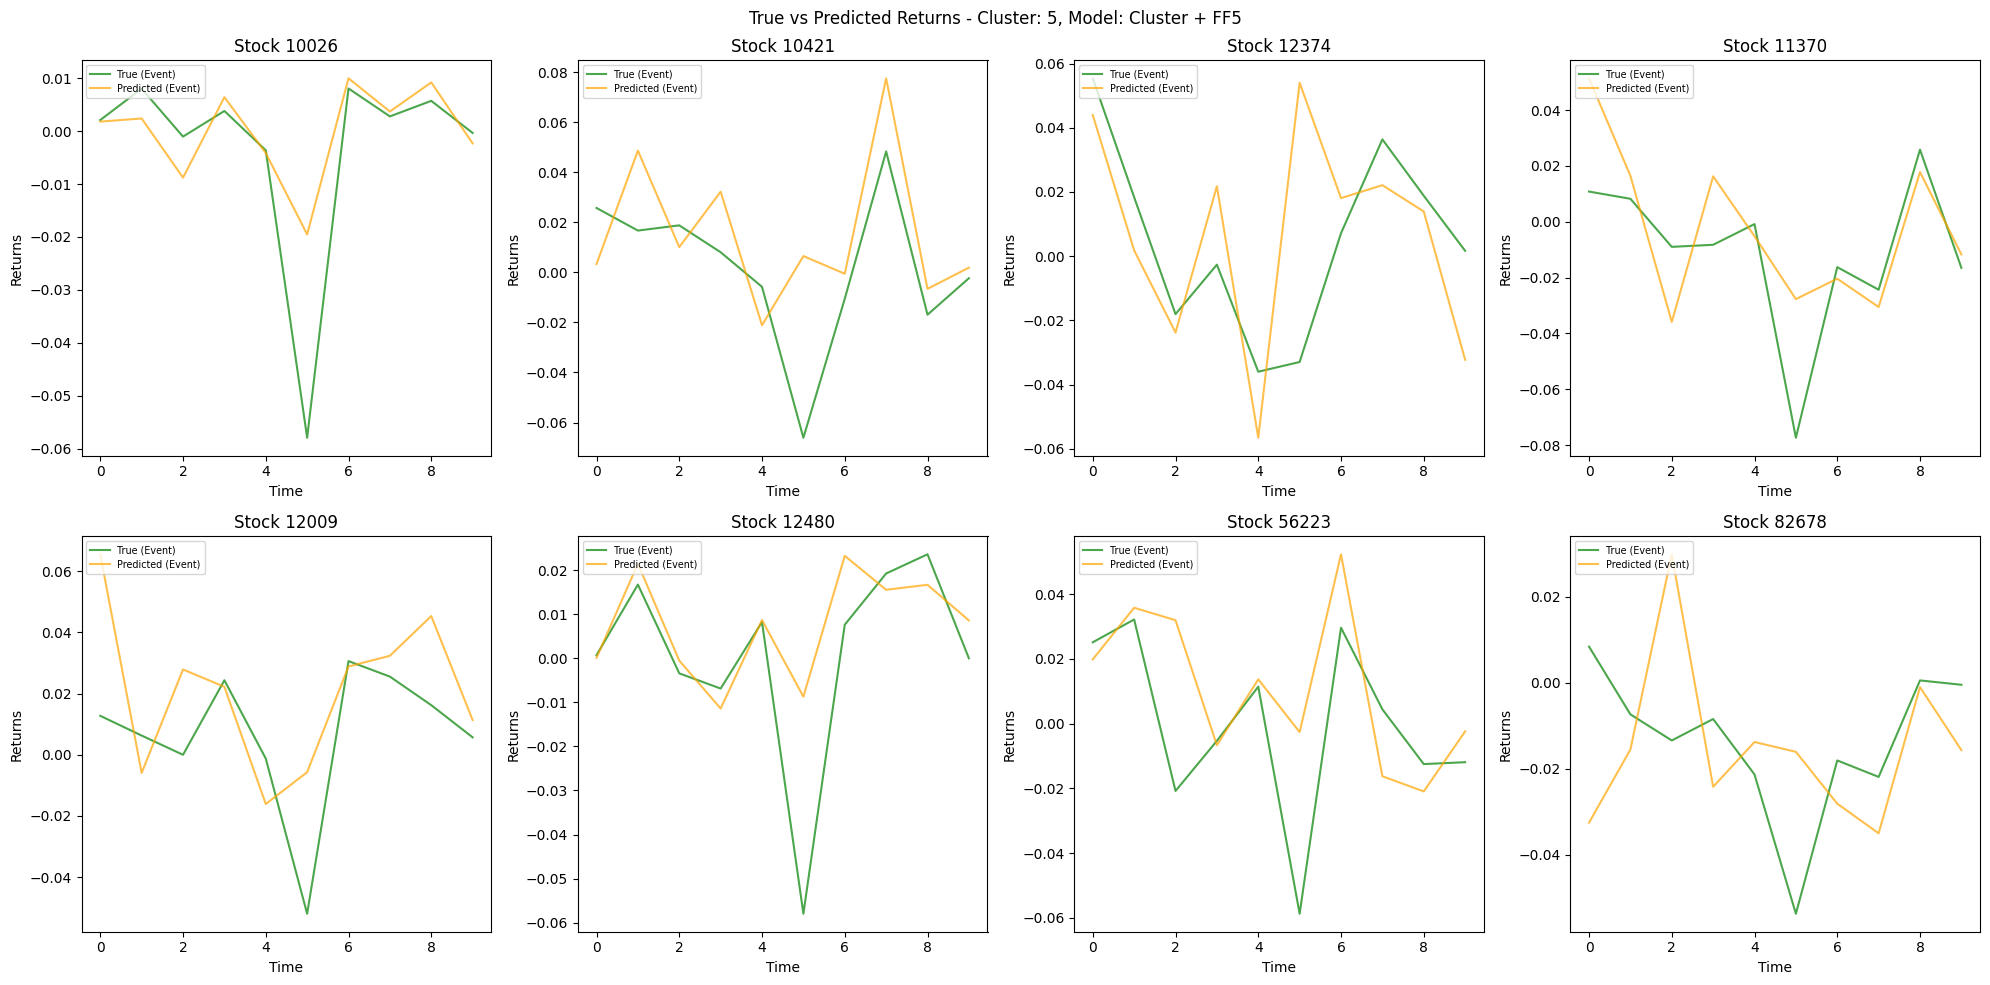

In [15]:
shocked_results = results.create_shocked_results(shock=0.05)
shocked_results.plot(5, 'Cluster + FF5', only_event=True)